# Train explorer

In [1]:
kind = "de_novo"
losses_path = f"losses/{kind}"


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os 

In [3]:
def plot_training(v_loss, t_loss, name):
    plt.figure(figsize=(8, 8))
    plt.plot(v_loss)
    plt.plot(t_loss)
    plt.legend(["validation loss", "training loss"])
    plt.title(f"{name} - loss over epochs")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    #plt.ylim(1,2)
    plt.show()

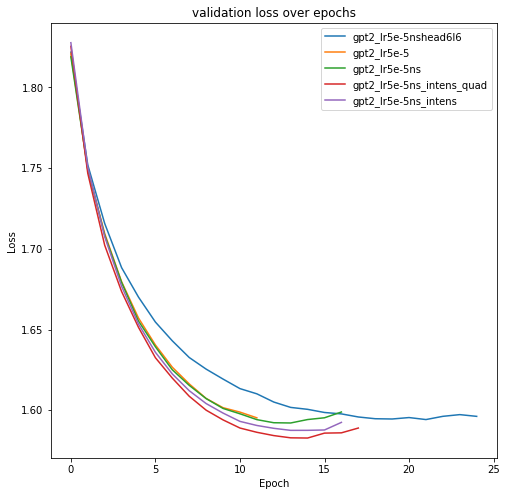

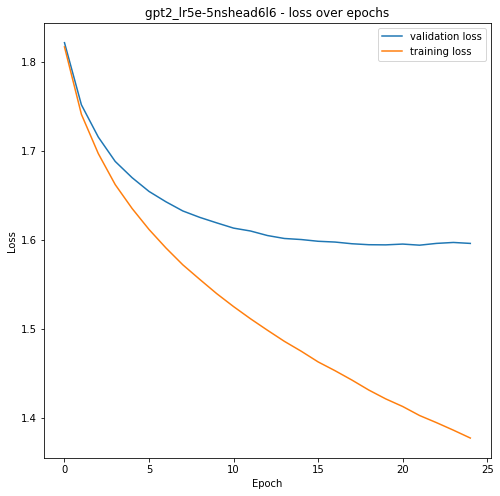

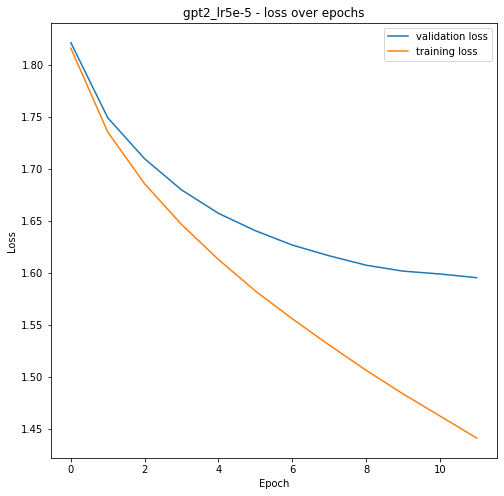

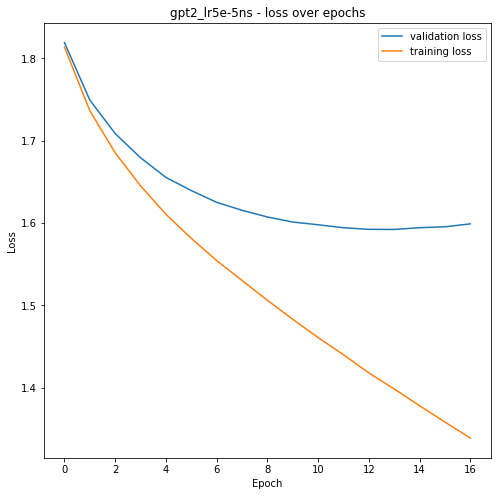

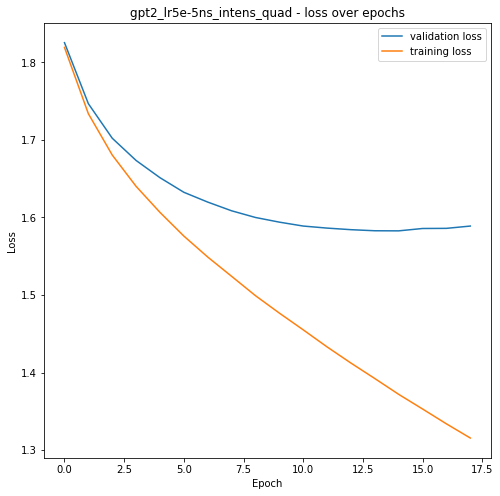

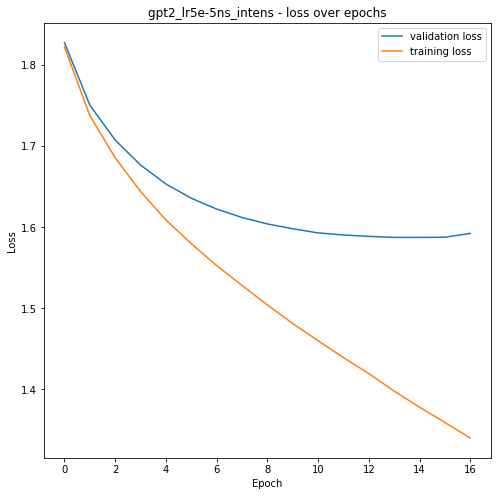

gpt2_lr5e-5nshead6l6
val
[1.82181349 1.75200488 1.71571198 1.68832453 1.67006242 1.65460733
 1.64297819 1.63265225 1.62545421 1.61929162 1.61338086 1.61014957
 1.60506083 1.60173738 1.60054517 1.59859155 1.59771766 1.59581251
 1.59472598 1.594559   1.59544757 1.59420545 1.59620924 1.59726647
 1.59619041]
train:
[1.81708771 1.7413241  1.6971371  1.66229584 1.63540859 1.61184611
 1.59108847 1.5720942  1.55575432 1.53977017 1.52517174 1.51149344
 1.4986342  1.48616703 1.4750081  1.46299314 1.45311498 1.44257761
 1.43132586 1.42140983 1.41288228 1.40272937 1.39472821 1.386266
 1.37742822]
------------------------------
gpt2_lr5e-5
val
[1.82107569 1.74892252 1.7095012  1.67961325 1.65710322 1.64042575
 1.62663189 1.61630184 1.60728296 1.60156304 1.59882336 1.59527811]
train:
[1.81570982 1.73525213 1.68545273 1.64635138 1.6127445  1.58249698
 1.55582828 1.53056598 1.50637239 1.48364205 1.46242582 1.44116517]
------------------------------
gpt2_lr5e-5ns
val
[1.81893118 1.74918248 1.70849768 1

In [27]:
def get_losses_by_kw(keyword, path, kw_omit=None):
    for root, dirs, files in os.walk(path, topdown=False):
        losses = dict()
        for name in files:
            if "val" in name and keyword in name and not kw_omit in name:
                losses[name.split("_val")[0]] = {}
        for name in files:
            if keyword in name and ".npy" in name and not kw_omit in name:
                    if "val" in name:
                        mname = name.split("_val")[0]
                        losses[mname]["val"] = np.load(f"{path}/{name}")
                    if "train" in name:
                        mname = name.split("_train")[0]
                        losses[mname]["train"] = np.load(f"{path}/{name}")
    return losses

def show_losses(losses):
    for key in losses:
        try:
            plot_training(losses[key]["val"], losses[key]["train"], key)
        except:
            print(f"losses not saved for {key}")
            
def print_losses(losses):
    for key in losses:
        try:
            print(key)
            print("val")
            print(losses[key]["val"])
            print("train:")
            print(losses[key]["train"])
            print("-"*30)
        except:
            print(f"losses not saved for {key}")

def show_joint_losses(losses, kind="validation"):
    plt.figure(figsize=(8, 8))
    for key in losses:
        if kind == "train":
            plt.plot(losses[key]["train"])
        else:
            plt.plot(losses[key]["val"])

    plt.legend(losses.keys())
    plt.title(f"{kind} loss over epochs")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")

kw = "gpt"
kw_omit= "30"
losses = get_losses_by_kw(kw, losses_path, kw_omit=kw_omit)       

show_joint_losses(losses)
plt.savefig(f"figures/{kind}/{kw}.pdf")
show_losses(losses)
print_losses(losses)
